In [4]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from generate_spectrogram import get_spectrogram_sampling_rate, display_spectrogram
import os
import json
from matplotlib import pyplot as plt
import pickle

In [5]:
audio_path = 'C:\\Users\\ehopl\\Desktop\\Fourth Year\\Disseration\\bat_data_oct_2020_ug4\\audio\\mc_2018\\audio\\'

In [6]:
with open("removed_data.txt", "rb") as fp:
    removed_data = pickle.load(fp)

In [7]:
class BatAnnotationDataSet(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, json_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.bat_anns = json.load(open(json_file))
        self.bat_anns = [x for x in self.bat_anns if x['id'] not in removed_data]
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.bat_anns)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        wav_name = self.bat_anns[idx]['id']
        anns = self.bat_anns[idx]
        spec, sampling_rate = get_spectrogram_sampling_rate(audio_path + wav_name)
        sample = {'wav_file': wav_name, 'spectrogram': spec ,'sampling_rate': sampling_rate, 'annotations': anns}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [8]:
class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        wav_file, spectrogram, sampling_rate, annotations  = sample['wav_file'], sample['spectrogram'], sample['sampling_rate'], sample['annotations']
                
        return {'wav_file': wav_file, 'spectrogram': torch.from_numpy(spectrogram), 'sampling_rate': sampling_rate, 'annotations': annotations}

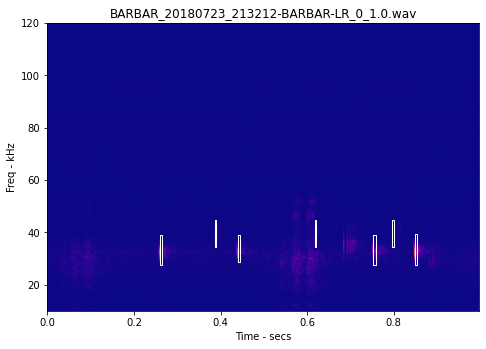

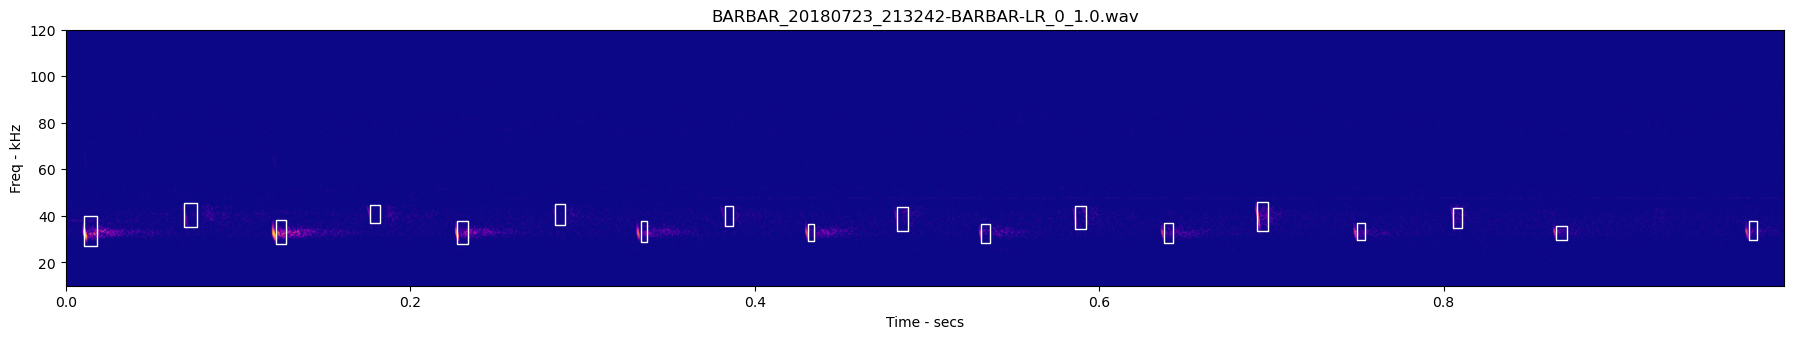

In [9]:
bat_dataset = BatAnnotationDataSet(json_file='C:\\Users\\ehopl\\Desktop\\Fourth Year\\Disseration\\bat_data_oct_2020_ug4\\annotations\\BritishBatCalls_MartynCooke_2018_1_sec_train_expert.json',
                                   root_dir=audio_path,
                                   transform = ToTensor()
                                  )

fig = plt.figure()

for i in range(len(bat_dataset)):
    sample = bat_dataset[i]
    display_spectrogram(audio_path + sample['wav_file'], sample['spectrogram'], sample['sampling_rate'], sample['annotations'])
    if i == 1:
        plt.show()
        break

In [10]:
def show_bat_annotation_batch(sample_batched):
    for sample in sample_batched:
            display_spectrogram(audio_path + sample['wav_file'], sample['spectrogram'], sample['sampling_rate'], sample['annotations'])

Batch number 0


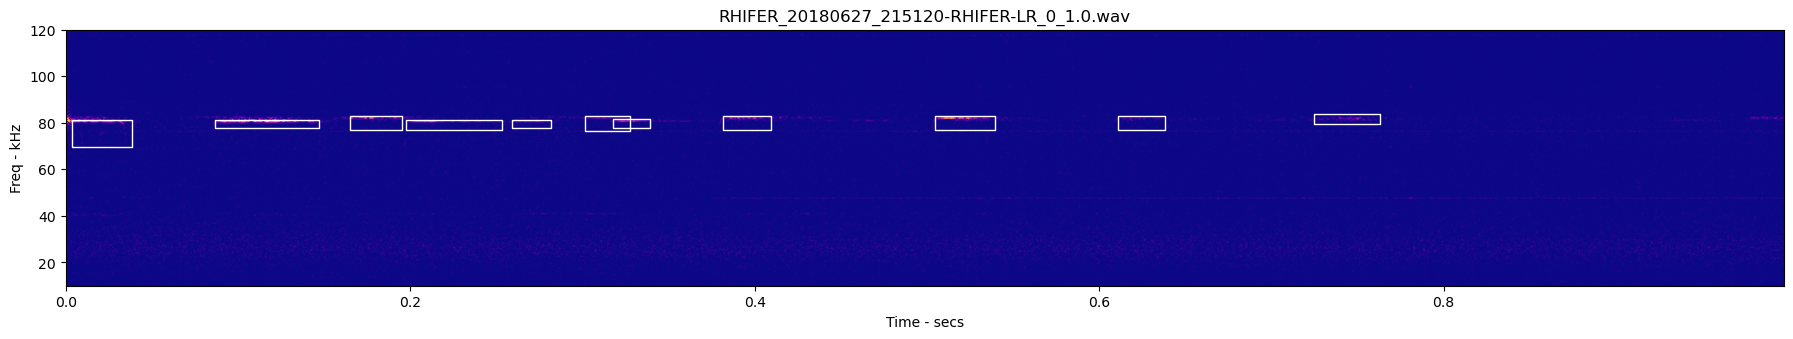

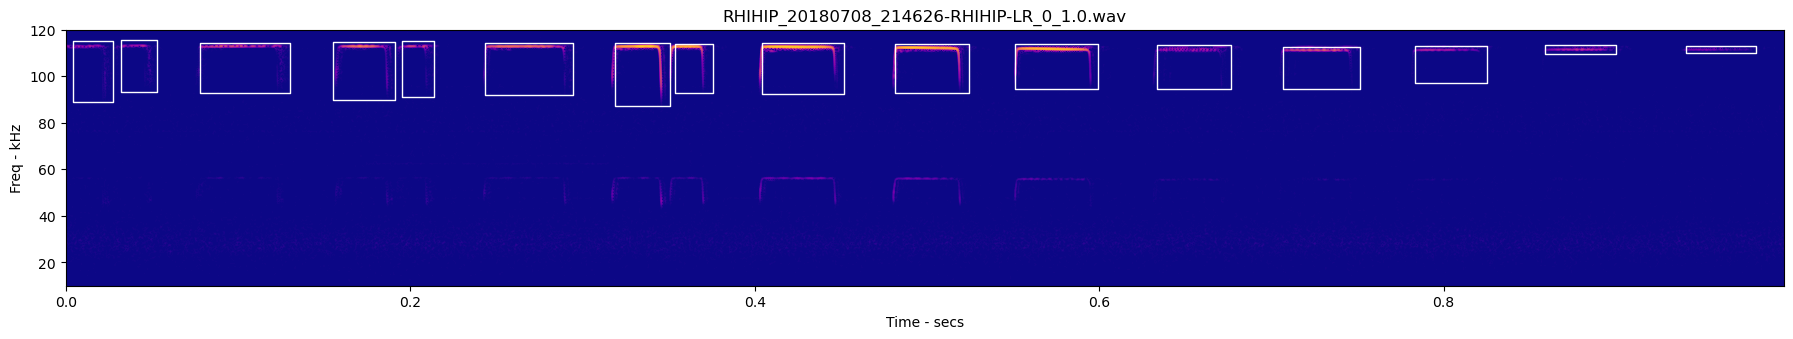

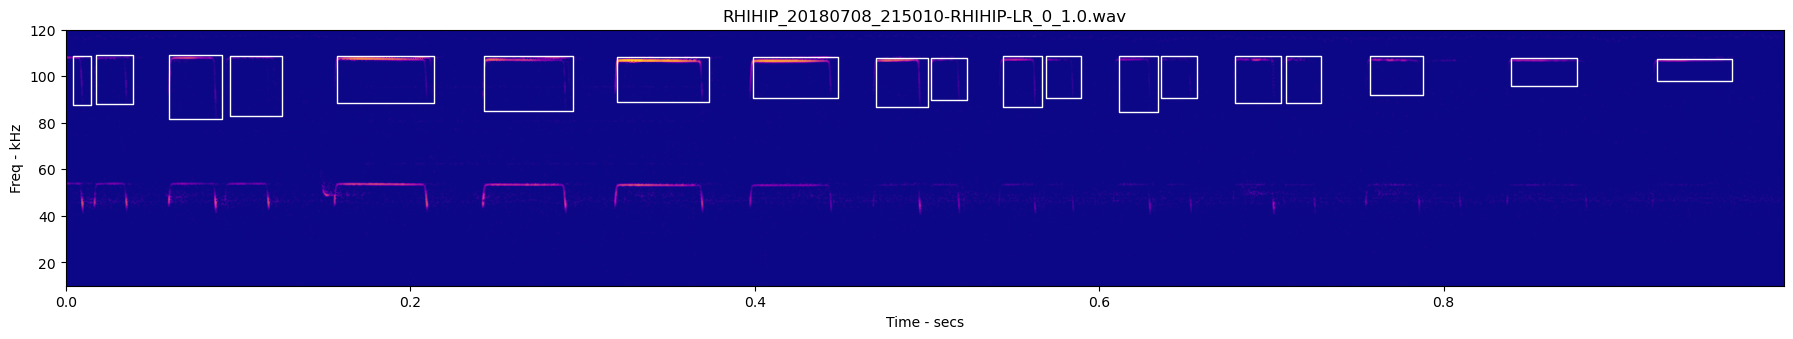

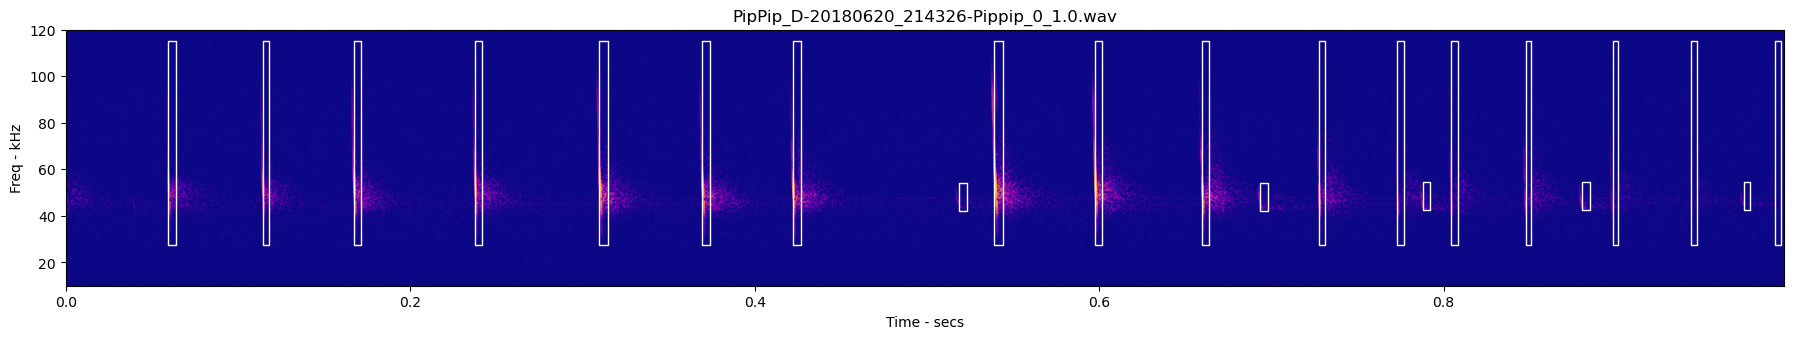

Batch number 1


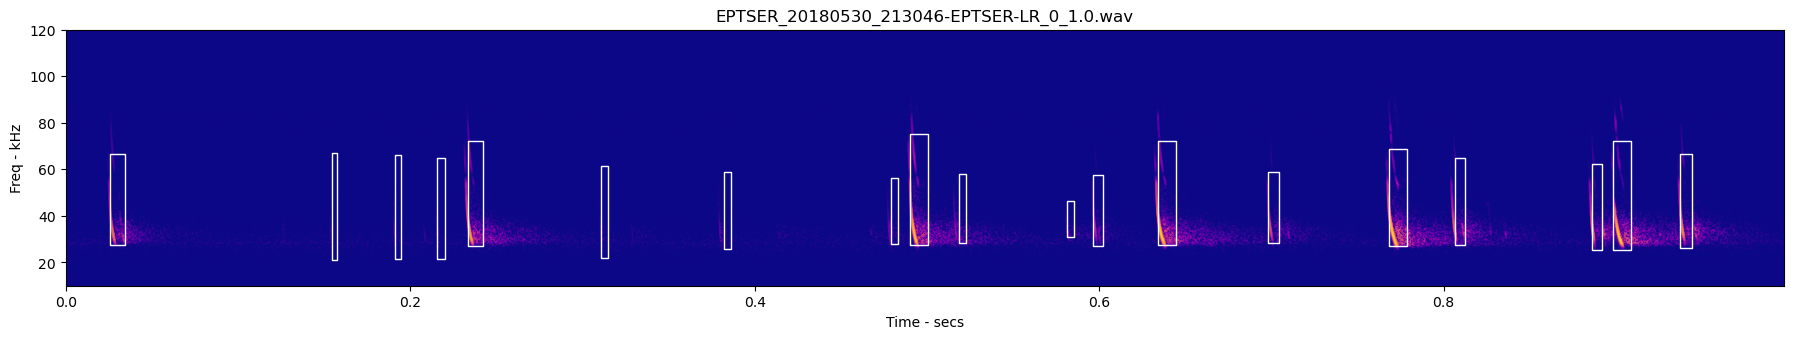

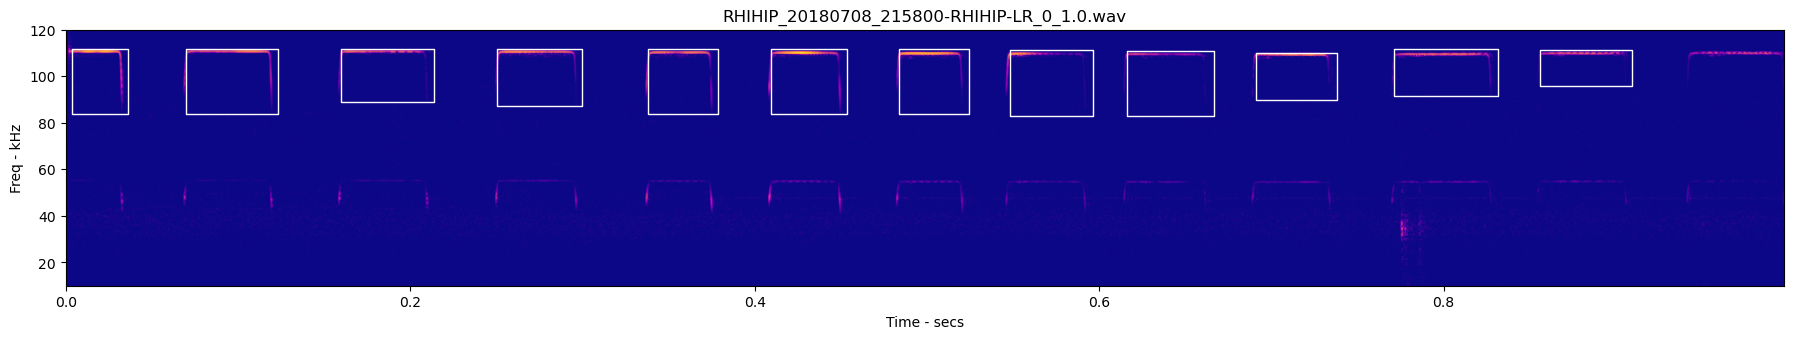

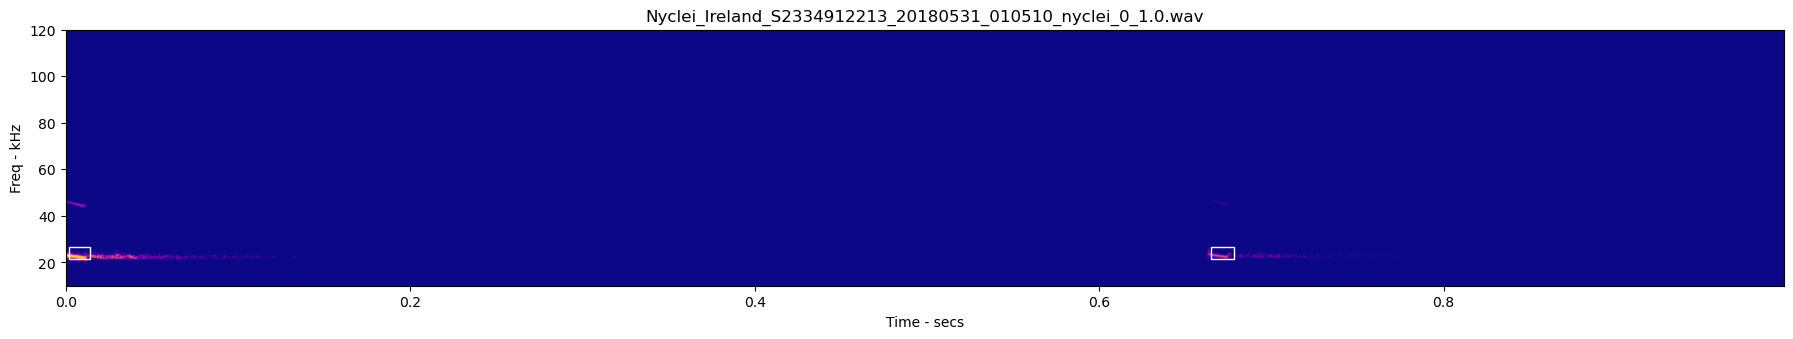

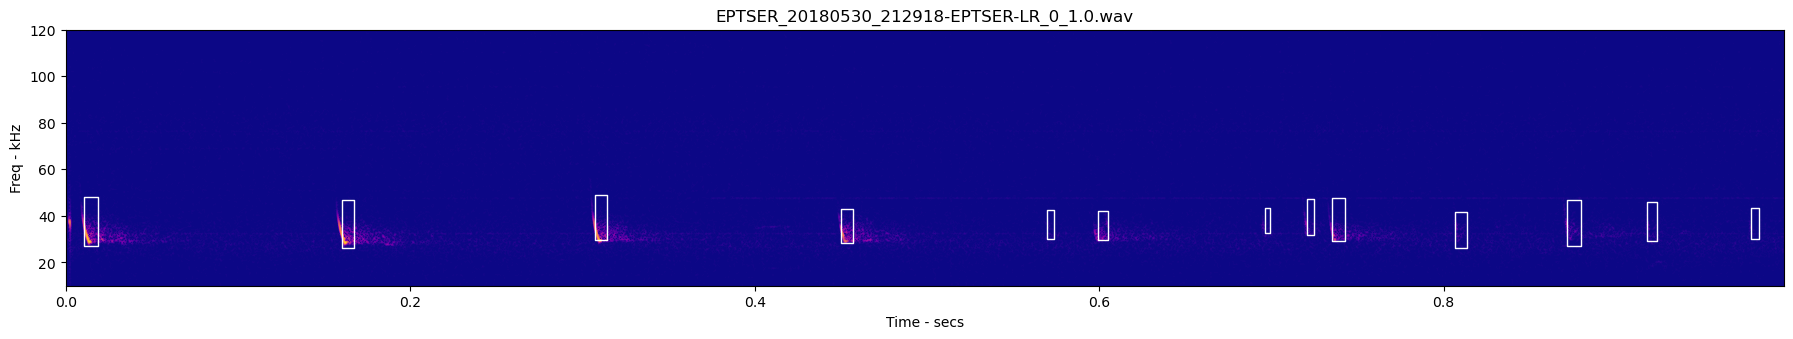

In [11]:
dataloader = DataLoader(bat_dataset, batch_size=4,
                        shuffle=True, num_workers=0, collate_fn=lambda x: x)

cnt = 0

for i_batch, sample_batched in enumerate(dataloader):
    print('Batch number {}'.format(i_batch))
    show_bat_annotation_batch(sample_batched)
    
    if cnt == 1:
        break
    cnt += 1